Importing Libraries

In [164]:
import pandas as pd  # Handle data as DataFrame
import seaborn as srn  # Plot graphs
import statistics as sts  # Calculate statistics

Importing Dataset

In [165]:
 # Assigning dataset to variable
dataset = pd.read_csv('tempo.csv', sep=";")
# Displaying dataset header
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


Analyzing Dataset Size

In [166]:
# Displaying dataset shape
dataset.shape

(14, 5)

Analisando valores faltantes

In [167]:
# Checking for null values in the dataset
dataset.isnull().sum() 

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Starting Exploratory Analysis of Categorical Data.
Column: Aparencia

In [168]:
# Grouping by 'Appearance' and displaying the size of each group
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Removing indicators that do not belong to the domain/business rule. Assigning indicators for values outside the domain to 'Sun'; for categorical data, values outside the domain will take on the mode value.

In [169]:
# Updating 'Appearance' values where it is 'menos' to 'sol
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

Validate alteration.

<Axes: xlabel='Aparencia'>

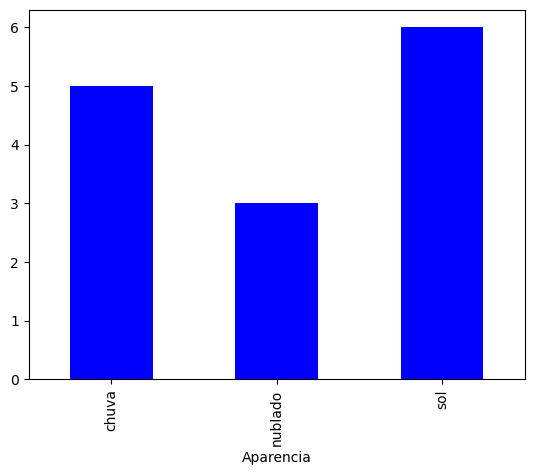

In [170]:
# Creating a bar plot to visualize the size of each group after updating 'Appearance'
agrupado = dataset.groupby(['Aparencia']).size()
agrupado.plot.bar(color= 'blue')

Ready! Now, the data in the 'appearance' column is in accordance with the domain. The next step will be to analyze the 'Wind' column.

<Axes: xlabel='Vento'>

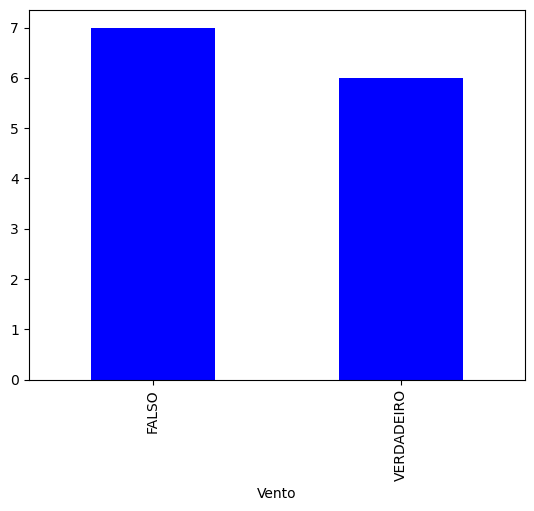

In [171]:
# Creating a bar plot to visualize the size of each group based on 'Wind' values
agrupado = dataset.groupby(['Vento']).size()
agrupado.plot.bar(color= 'blue')

Analyzing empty data.

In [172]:
# Checking for null values in the 'Wind' column
dataset['Vento'].isnull().sum()

1

Assign the mode value to the empty spaces.

In [173]:
# Filling null values in the 'Wind' column with 'FALSO'
dataset['Vento'].fillna('FALSO', inplace= True)

Validate alteration.

In [174]:
# Checking for null values in the 'Wind' column after filling missing values
dataset['Vento'].isnull().sum()

0

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

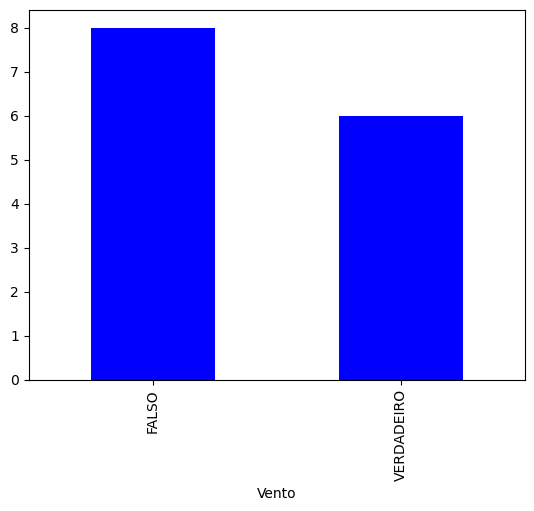

In [175]:
# Creating a bar plot to visualize the size of each group based on 'Wind' values
agrupado = dataset.groupby(['Vento']).size()
agrupado.plot.bar(color= 'blue')
agrupado

Missing values treated in the wind column. The next column will be Play.

In [176]:
# Displaying the size of each group based on the 'Play' column
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

Analyze missing data.

In [177]:
# Checking for null values in the 'Play' column
dataset['Jogar'].isnull().sum()

0

As we can see, everything is okay, as stated by the business rule. The next column will be the numeric data column, starting with Temperature.

In [178]:
# Displaying descriptive statistics for the 'Temperature' column
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Analyze empty data.

In [179]:
# Checking for null values in the 'Temperature' column
dataset['Temperatura'].isnull().sum() 

0

The business rule requires a temperature range between -130 and 130 °F. Therefore, we need to handle the data.

In [180]:
# Calculating the median of the 'Temperature' column
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [181]:
# Replacing values in 'Temperature' column greater than 130 with the calculated median
dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = mediana

Validate adjustments.

Text(0.5, 1.0, 'Temperatura')

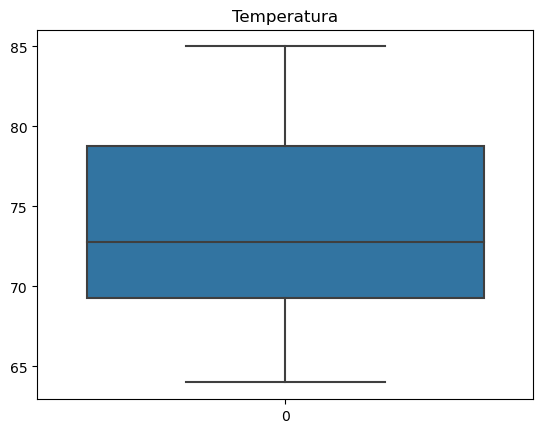

In [182]:
# Displaying descriptive statistics for the 'Temperature' column
dataset['Temperatura'].describe()
# Creating a boxplot to visualize the distribution of 'Temperature'
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Ready, the data is in compliance. The next column will be Humidity.

In [183]:
# Displaying descriptive statistics for the 'Humidity' column
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Analyze empty data.

In [184]:
# Checking for null values in the 'Humidity' column
dataset['Umidade'].isnull().sum()

1

Handle empty data.

In [185]:
# Calculating the median of the 'Humidity' column
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [186]:
# Filling null values in the 'Humidity' column with the calculated median
dataset['Umidade'].fillna(mediana, inplace=True)

Validate adjustments.

In [187]:
# Checking for null values in the 'Humidity' column after filling missing values
dataset['Umidade'].isnull().sum()

0

Now, we'll handle values that are outside the business rules.

In [188]:
# Replacing values in 'Humidity' column greater than 100 with the calculated median
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = mediana

Text(0.5, 1.0, 'Umidade')

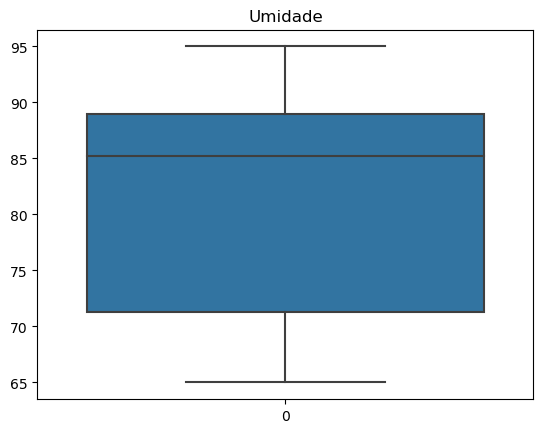

In [189]:
# Displaying descriptive statistics for the 'Humidity' column
dataset['Umidade'].describe()
# Creating a boxplot to visualize the distribution of 'Humidity'
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Ready! Now all the data is properly adjusted.

In [191]:
# Displaying the entire dataset
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
